# Perkenalan

Nama : Muhammad Fauzan

Milestone 2

Phase 2

## Tentang Dataset

Dataset yang digunakan [disini](https://www.kaggle.com/yaswanthgali/sport-celebrity-image-classification?select=Sports-celebrity+images)

Dataset berisi foto-foto selebriti olahraga dengan nama selebriti sebagai berikut:

* Kane Williamson
* Kobe Bryant
* Maria Sharapova
* Ronaldo

## Objektif

Mampu membuat model Computer Vision (Image Classification) dan memprediksi nama dari selebriti olahraga.

# Import Pustaka

In [ ]:
# import pustaka
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import pandas as pd
import os
import random
from PIL import Image
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Rescaling, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization, Dropout
import warnings
warnings.filterwarnings("ignore")

# Data Loading

Import dataset dari google drive (saya menyimpan dataset di dalam google drive).

In [ ]:
# import dataset
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
% cd /content/gdrive/My Drive/SPORTS_CELEBRITY_IMAGES

/content/gdrive/My Drive/SPORTS_CELEBRITY_IMAGES


In [ ]:
! ls datasets

prediction  train  validation


# Data Exploration

Kita akan melihat folder mana saja yang mengandung foto-foto selebriti olahraga.

In [ ]:
# folders that contain the dataset
for dirpath, dirnames, filenames in os.walk('datasets'):
  print(f"There is/are {len(dirnames)} folder(s) and {len(filenames)} picture(s) in {dirpath}")

There is/are 3 folder(s) and 0 picture(s) in datasets
There is/are 4 folder(s) and 0 picture(s) in datasets/train
There is/are 0 folder(s) and 77 picture(s) in datasets/train/Ronaldo
There is/are 0 folder(s) and 84 picture(s) in datasets/train/Kane_Williamson
There is/are 0 folder(s) and 77 picture(s) in datasets/train/Kobe_Bryant
There is/are 0 folder(s) and 73 picture(s) in datasets/train/Maria_Sharapova
There is/are 4 folder(s) and 0 picture(s) in datasets/prediction
There is/are 0 folder(s) and 6 picture(s) in datasets/prediction/Ronaldo
There is/are 0 folder(s) and 7 picture(s) in datasets/prediction/Kane_Williamson
There is/are 0 folder(s) and 6 picture(s) in datasets/prediction/Kobe_Bryant
There is/are 0 folder(s) and 6 picture(s) in datasets/prediction/Maria_Sharapova
There is/are 4 folder(s) and 0 picture(s) in datasets/validation
There is/are 0 folder(s) and 26 picture(s) in datasets/validation/Ronaldo
There is/are 0 folder(s) and 28 picture(s) in datasets/validation/Kane_Wil

Kemudian, saya ingin melihat beberapa foto selebriti olahraga.

In [ ]:
# Function to view random image
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img);
  plt.title(target_class);
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

Image shape: (408, 612, 3)


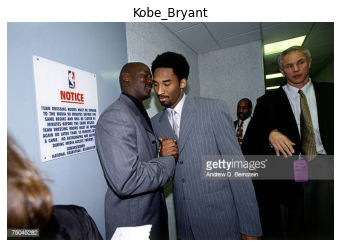

In [ ]:
# view image
img = view_random_image(target_dir='datasets/train/',
                        target_class='Kobe_Bryant')

Image shape: (408, 612, 3)


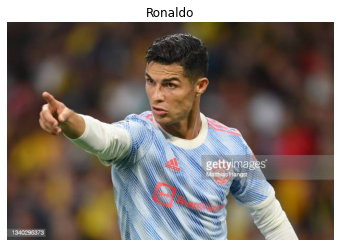

In [ ]:
# view image
img = view_random_image(target_dir='datasets/validation/',
                        target_class='Ronaldo')

# Data Preprocessing

Definisikan folder train, val, dan pred terlebih dahulu.

In [ ]:
# define the folder for train, val, pred
train_folder=r'datasets/train/'
validation_folder=r'datasets/validation/'
prediction_folder=r'datasets/prediction/'

In [ ]:
# define some parameters
IMG_WIDTH = 160
IMG_HEIGHT = 160
batch_size = 16

In [ ]:
# standarisasi
datagen = ImageDataGenerator(rescale = 1. / 255.0)

In [ ]:
# train dataset
train_dataset = datagen.flow_from_directory(
    train_folder,
    shuffle=True,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'categorical'
    )

Found 311 images belonging to 4 classes.


In [ ]:
# validation dataset
validation_dataset = datagen.flow_from_directory(
  validation_folder,
  shuffle=True,
  target_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=batch_size,
  class_mode = 'categorical'
  )

Found 105 images belonging to 4 classes.


In [ ]:
# prediction dataset
prediction_dataset = datagen.flow_from_directory(
  prediction_folder,
  shuffle=True,
  target_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=batch_size,
  class_mode = 'categorical'
  )

Found 25 images belonging to 4 classes.


# Definisi, Pelatihan, dan Evaluasi Model

In [ ]:
# define the model
model = Sequential()
model.add(Conv2D(16, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPool2D(2))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
# compile model 
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

In [ ]:
# train model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=3)

Epoch 1/3
20/20 [==============================] - 13s 571ms/step - loss: 1.4008 - accuracy: 0.2412 - val_loss: 1.3598 - val_accuracy: 0.2571
Epoch 2/3
20/20 [==============================] - 10s 491ms/step - loss: 1.2961 - accuracy: 0.3762 - val_loss: 1.2242 - val_accuracy: 0.4190
Epoch 3/3
20/20 [==============================] - 10s 502ms/step - loss: 1.1002 - accuracy: 0.5080 - val_loss: 1.1762 - val_accuracy: 0.4857


In [ ]:
## Create function plotting for evaluation
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

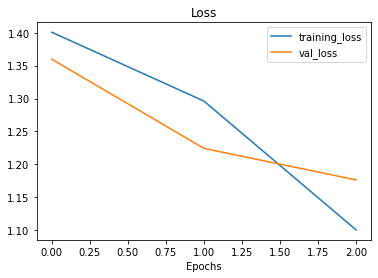

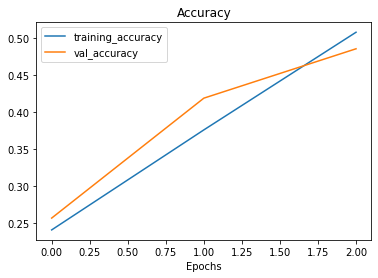

In [ ]:
plot_loss_curves(history)

In [ ]:
# Define for Model Evaluation
eval = model.predict(validation_dataset)
pred_classes = np.argmax(eval, axis=1)

true_classes = validation_dataset.classes
class_labels = list(validation_dataset.class_indices.keys())

In [ ]:
# Classification Report
class_report = classification_report(true_classes, pred_classes, target_names = class_labels)
print(class_report)

                 precision    recall  f1-score   support

Kane_Williamson       0.39      0.50      0.44        28
    Kobe_Bryant       0.24      0.30      0.27        27
Maria_Sharapova       0.32      0.33      0.33        24
        Ronaldo       0.45      0.19      0.27        26

       accuracy                           0.33       105
      macro avg       0.35      0.33      0.33       105
   weighted avg       0.35      0.33      0.33       105



# Model Improvement

In [ ]:
# data augmentation
data_augmentation = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.1,
                                             shear_range=0.1,
                                             zoom_range=0.1,
                                             width_shift_range=0.1,
                                             height_shift_range=0.1,
                                             horizontal_flip=True)

In [ ]:
# train_augmented_dataset
train_augmented_dataset = data_augmentation.flow_from_directory(
    train_folder,
    shuffle=True,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'categorical'
    )

Found 311 images belonging to 4 classes.


In [ ]:
# validation_augmented_dataset
validation_augmented_dataset = data_augmentation.flow_from_directory(
  validation_folder,
  shuffle=True,
  target_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=batch_size,
  class_mode = 'categorical'
  )

Found 105 images belonging to 4 classes.


In [ ]:
# prediction_augmented_dataset
prediction_augmented_dataset = data_augmentation.flow_from_directory(
  prediction_folder,
  shuffle=True,
  target_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=batch_size,
  class_mode = 'categorical'
  )

Found 25 images belonging to 4 classes.


In [ ]:
# define the model
model_improved = Sequential()
model_improved.add(Conv2D(16, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model_improved.add(Dropout(0.2))
model_improved.add(MaxPool2D(2))
model_improved.add(Conv2D(32, 3, activation='relu'))
model_improved.add(Dropout(0.2))
model_improved.add(MaxPool2D(2))
model_improved.add(Conv2D(64, 3, activation='relu'))
model_improved.add(Dropout(0.2))
model_improved.add(MaxPool2D(2))
model_improved.add(Flatten())
model_improved.add(Dense(128, activation='relu'))
model_improved.add(Dense(64, activation='relu'))
model_improved.add(Dense(16, activation='relu'))
model_improved.add(Dense(4, activation='softmax'))

In [ ]:
# summary of the model
model_improved.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 158, 158, 16)      448       
                                                                 
 dropout (Dropout)           (None, 158, 158, 16)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 79, 79, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 77, 77, 32)        4640      
                                                                 
 dropout_1 (Dropout)         (None, 77, 77, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                  

In [ ]:
# compile model 
model_improved.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

In [ ]:
# train model
history1 = model_improved.fit(train_augmented_dataset, validation_data=validation_augmented_dataset, epochs=3)

Epoch 1/3
20/20 [==============================] - 16s 741ms/step - loss: 1.4164 - accuracy: 0.2830 - val_loss: 1.3729 - val_accuracy: 0.2667
Epoch 2/3
20/20 [==============================] - 14s 710ms/step - loss: 1.2786 - accuracy: 0.4148 - val_loss: 1.1788 - val_accuracy: 0.5238
Epoch 3/3
20/20 [==============================] - 14s 684ms/step - loss: 1.2121 - accuracy: 0.4727 - val_loss: 1.1436 - val_accuracy: 0.5429


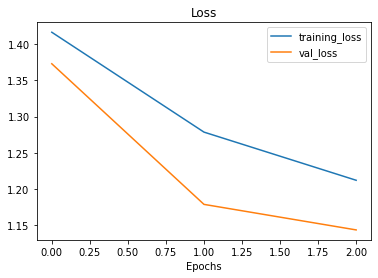

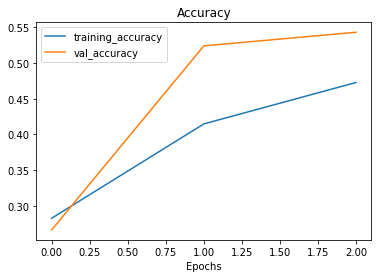

In [ ]:
plot_loss_curves(history1)

In [ ]:
# Define for Model Evaluation
eval_improved = model.predict(validation_augmented_dataset)
pred_classes_improved = np.argmax(eval_improved, axis=1)

true_classes_improved = validation_augmented_dataset.classes
class_labels_improved = list(validation_augmented_dataset.class_indices.keys())

In [ ]:
# Classification Report
class_report_improved = classification_report(true_classes_improved, pred_classes_improved, target_names = class_labels_improved)
print(class_report)

                 precision    recall  f1-score   support

Kane_Williamson       0.39      0.50      0.44        28
    Kobe_Bryant       0.24      0.30      0.27        27
Maria_Sharapova       0.32      0.33      0.33        24
        Ronaldo       0.45      0.19      0.27        26

       accuracy                           0.33       105
      macro avg       0.35      0.33      0.33       105
   weighted avg       0.35      0.33      0.33       105



# Model Inference

Ambil sampel foto dari folder prediction.

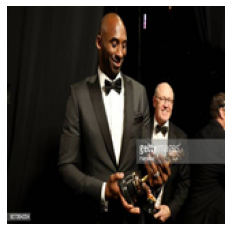

In [ ]:
# image 1
img_1 = Image.open('/content/kobe_(107).jpg')
img_1 = img_1.resize((160,160), Image.ANTIALIAS)
plt.imshow(img_1);
plt.axis(False);

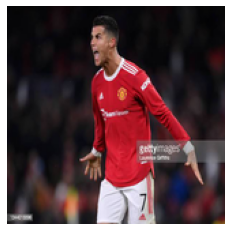

In [ ]:
# image 2
img_2 = Image.open('/content/ronaldo_(106).jpg')
img_2 = img_2.resize((160,160), Image.ANTIALIAS)
plt.imshow(img_2);
plt.axis(False);

In [ ]:
prediction_dataset.class_indices

{'Kane_Williamson': 0, 'Kobe_Bryant': 1, 'Maria_Sharapova': 2, 'Ronaldo': 3}

In [ ]:
## prediction for image 1
img_1 = tf.expand_dims(np.array(img_1), axis=0)
result = model.predict(img_1)
result_improved = model_improved.predict(img_1)

In [ ]:
## prediction for image 2
img_2 = tf.expand_dims(np.array(img_2), axis=0)
result2 = model.predict(img_2)
result2_improved = model_improved.predict(img_2)

In [ ]:
# result from the first model
result.argmax()

1

In [ ]:
# result2 from the first model
result2.argmax()

3

In [ ]:
# result from the improved model
result_improved.argmax()

1

In [ ]:
# result2 from the improved model
result2_improved.argmax()

1

# Kesimpulan

* Tidak ada perbedaan yang signifikan antara model yang sudah diimprove dan yang tidak.

* Model sebelum diimproved bisa memprediksi dengan baik saat model inference, sedangkan model yang diimproved salah memprediksi image kedua.